In [63]:
import numpy as np
import pandas as pd
import openpyxl
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random

#plt.style.use('ggplot')
plt.style.use('tableau-colorblind10')

In [15]:
%matplotlib inline

# План исследования

1) Описание данных

2) Критерий знаков и ранговый тест Уилкоксона для связанных выборок

3) Выбор подвыборки из группы не проходивших обучение. Повторяемые испытания. Ранговый критерий Манна-Уитни для несвязанных выборок.

4) Коэффициент Фи-Гилфорда

5) Выводы

## Описание данных

#### Описание

Для исследования взяты следующие данные:

-- По сотрудникам, ПРОХОДИВШИМ обучение "Управление проектами" (до 2022 года) и их оценки итоговой эффективности: бинарная (выполнил/невыполнил KPI) и количественная до и после обучения (таким образом за оценку после обучения взята оценка в 2022 году). Данные сотрудники являются в основном руководителями. Размер данной выборки - 31. 

-- По сотрудникам, НЕ ПРОХОДИВШИМ обучение "Управление проектами" и их оценки итоговой эффективности: бинарная и количественная до 2022 года и в 2022 году. Из всей массы сотрудников с оценками взяты те, в должностях которых присутствуют ключевые слова "Ведущий, Главный, Руководитель, Начальник, Менеджер". Размер данной выборки - 151.

#### Ограничения и допущения

##### О бинарных и количественных оценках

Для бизнеса важен сам факт того, выполняет сотрудник KPI или нет, поэтому приортетными данными для анализа являются бинарные оценки результативности. Однако, к примеру, в выборке сотрудников, проходивших обучение нет выраженного отличия у оценок до и после обучения: 25 сотрудников выполнили KPI до и после обучения; 2 не выполнили до и после; 1 не выполнил до, но выполнил после; 3 - выполнили до и не выполнили после. 

Переводя количественные оценки в бинарные теряется часть информации. Хотелось бы ее не терять и проанализировать количественные оценки. Здесь сталкиваемся с первыми ограничениями и допущениями:

1) Мы НЕ МОЖЕМ сравнивать количественные оценки разных сотрудников, поскольку нормативы оценивания, а также задачи могут различаться (что часто происходит)

2) Однако, мы МОЖЕМ сравнивать количественные оценки одного и того же сотрудника в прошлом году и в текущем, т.к. нормативы оценивания меняются крайне редко и такими случаями мы можем пренебречь. Таким образом, мы допускаем, что нормативы оценивания количественной оценки сотрудника не изменяются.

##### О стаже и его влиянии на эффективность

Ввиду того, что мы не можем сравнивать количественные оценки сотрудников, но хотим потенциально сравнить две несвязанные выборки (тех, кто проходил обучение и тех, кто не проходил), нам нужна мера, которая помогла бы нам извлечь из выборки не проходивших обучение подвыборку максимально похожую на выборку проходивших обучение.

Предположения: 

После двух лет работы эффективность сотрудника выходит на плато и уже не связана с его адаптацией в компании. Возможные отклонения: улучшения или ухудшения связаны с внешними факторами (например, финансовый кризис), личными или профессиональные, например, с приобретением новых навыков в результате прохождения обучения. Таким образом, вводим два допущения:

1) Эффективность двух групп сотрудников с похожим РАСПРЕДЕЛЕНИЕМ СТАЖЕЙ не завязана на адаптации. Считаем, что такие две группы имеют одинаковые "входные данные"

2) Внешние факторы для двух разных исследуемых групп в ОДИН И ТОТ ЖЕ ГОД одинаковы. (Например, если возникла какая-то внешняя кризисная ситуация в определенном году, которая повлияла на результат - то она возникла сразу у всех. В один и тот же год все в одинаковых условиях)

3) * Относительные изменения в эффективности сотрудников из одного года в другой принадлежат одному и тому же распределению. Грубо говоря, если один сотрудник смог улучшить свою эффективность на k%, любой другой сотрудник теоретически также мог это сделать. (Данное предположение проверим статистически) 

4) ! Дописать про KPI

## Связанные выборки. Критерий знаков, ранговый тест Уилкоксона

Описание:

Берем только тех сотрудников, которые проходили обучение. В качестве выборок берем количественные оценки до и после обучения. Эти выборки будут связанными, малыми. Применим тест Уилкоксона для связанных выборок, а также критерий знаков.

[О критерии Уилкоксона для связанных выборок](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A3%D0%B8%D0%BB%D0%BA%D0%BE%D0%BA%D1%81%D0%BE%D0%BD%D0%B0_%D0%B4%D0%BB%D1%8F_%D1%81%D0%B2%D1%8F%D0%B7%D0%BD%D1%8B%D1%85_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BE%D0%BA)

[О ранговом критерии знаков](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2)

Преимущества: 
1) Анализируем одних и тех же сотрудников. По сути проверяем их же навыки до и после обучения. \
2) Используем количественные оценки, т.к. у одних и тех же сотрудников сравнивать количественные оценки позволяет сделанное предположение.

Недостаток: \
Есть вероятность, что внешние факторы в 2022 году могли как-то повлиять на эффективность сотрудников. Например, условный кризис подкосил все результаты KPI в 2022.

Как искоренить недостаток? Нужно включать в анализ сотрудников, которые обучение не проходили. И сравнивать изменения в оценках у первой группы с изменением оценок во второй. (П.3 текущего исследования)

Какие могут возникнуть проблемы при "устранении недостатка"? Выбор "похожей" подвыборки из выборки непроходивших обучение

In [8]:
df = pd.read_excel("1.xlsx", engine='openpyxl', sheet_name=0, header=0)

##### Вид исследуемого датасета

In [9]:
df.head()

,Unnamed: 0,До обучения,После обучения,До обучения (кол),После обучения (кол)
0,Афисов Димитрис,1,0,1.9,1.4
1,Бахтеев Александр,1,1,4.0,3.3
2,Безукладников Андрей,1,1,3.1,3.2
3,Беспалов Даниил,1,1,4.0,3.4
4,Вершинин Алексей,1,1,1.9,3.7


##### Описательные статистики

In [11]:
df[['До обучения (кол)','После обучения (кол)']].describe()

,До обучения (кол),После обучения (кол)
count,31.000000,31.000000
mean,3.012903,3.003226
std,0.776205,0.678471
min,1.800000,1.300000
25%,2.350000,2.850000
50%,3.100000,3.200000
75%,3.650000,3.350000
max,4.000000,4.000000


##### Гистограммы

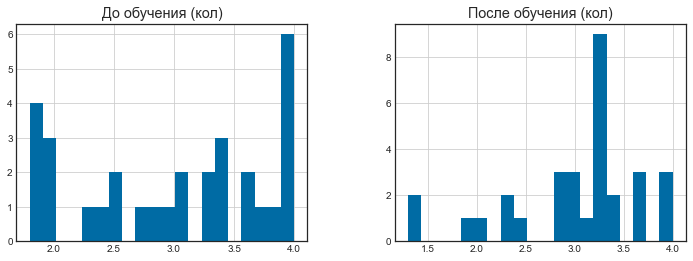

In [57]:
df[['До обучения (кол)','После обучения (кол)']].hist(figsize=(12,4), bins=20);

##### Критерий знаков

$H_0: P(X > Y) = 0.5$ Нулевая гипотеза: эффективность сотрудников не изменилась \
$H_1: P(X > Y) \ne 0.5$ Обратная гипотеза: эффективность сотрудников изменилась

P.S. Ниже для каждого теста будем считать p-value. Общий подход следующий:

Если p-value < 0.05, нулевая гипотеза отвергается. Иначе - не отвергается.

In [19]:
from statsmodels.stats.descriptivestats import sign_test

In [20]:
_, pvalue = sign_test(df['После обучения (кол)'] - df['До обучения (кол)'])
print(pvalue)

0.5715881884098053


p-value > 0.05, различия между количественными оценками не являются значимыми, они скорее случайны

##### Ранговый тест Уилкоксона для связанных выборок

$H_0: Med(X - Y) = 0$ Нулевая гипотеза: эффективность сотрудников не изменилась \
$H_1: Med(X - Y) > 0$ Обратная гипотеза: эффективность сотрудников, проходивших обучение выросла

In [24]:
stats.wilcoxon(df['После обучения (кол)'], df['До обучения (кол)'], alternative='greater')

WilcoxonResult(statistic=180.0, pvalue=0.6998539600285487)

Снова p-value > 0.05, различия между количественными оценками не являются значимыми

##### P.S. Критерий Колмогорова-Смирнова

In [25]:
stats.ks_2samp(df['После обучения (кол)'], df['До обучения (кол)'])

KstestResult(statistic=0.16129032258064516, pvalue=0.8234535171851342)

p-value > 0.05, данные оценки эффективности с большой уверенностью родом из одного и того же распределения

## Выбор подвыборки из группы не проходивших обучение.  Ранговый критерий Манна-Уитни для несвязанных выборок

[О ранговом критерии Манна-Уитни](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A3%D0%B8%D0%BB%D0%BA%D0%BE%D0%BA%D1%81%D0%BE%D0%BD%D0%B0-%D0%9C%D0%B0%D0%BD%D0%BD%D0%B0-%D0%A3%D0%B8%D1%82%D0%BD%D0%B8)

Описание:

В предположении о схожей потенциальной эффективности у двух групп с одинаковым распределением стажей, пользуемся следующим алгоритмом:

1) Рандомно выбираем подвыборку из 31 человека среди непроходивших обучения 

2) Применяем критерий Колмогорова-Смирнова о схожести распределений (тут допускаем, что стаж распределен непрерывно)

3) Если гипотеза из 2) подтверждается, сохраняем подвыборку для дальнейшего исследования

4) В дальнейшем будем проводить несколько категориальных экспериментов о схожести разницы оценок со всеми выбранными подвыборками

5) Сравниваем относительные разницы двух групп

In [29]:
df11 = pd.read_excel("11.xlsx", engine='openpyxl', sheet_name=1, header=0)
df22 = pd.read_excel("22.xlsx", engine='openpyxl', sheet_name=1, header=0)

##### Вид датасетов

In [184]:
df11.head()

,Unnamed: 0,До обучения,После обучения,До обучения (кол),После обучения (кол),Текущий стаж,Относительная разница
0,Афисов Димитрис,1,0,1.9,1.4,4.019165,-0.263158
1,Бахтеев Александр,1,1,4.0,3.3,5.021218,-0.175000
2,Безукладников Андрей,1,1,3.1,3.2,14.655715,0.032258
3,Беспалов Даниил,1,1,4.0,3.4,13.073238,-0.150000
4,Вершинин Алексей,1,1,1.9,3.7,3.301848,0.947368


In [31]:
df22.head()

,Unnamed: 0,2021,2022,2021 (кол),2022 (кол),Текущий стаж
0,Абашева Ульяна,1,0,3.0,2.0,11.006160
1,Абрамов Василий,1,1,3.0,3.0,11.868583
2,Азанов Александр,1,1,2.7,4.0,3.033539
3,Алалыкин Тимофей,1,0,4.0,2.0,13.073238
4,Бартов Олег,1,1,4.0,4.0,6.368241


##### Описательные статистики датасетов

In [34]:
df11.describe()

,До обучения,После обучения,До обучения (кол),После обучения (кол),Текущий стаж
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,0.903226,0.838710,3.012903,3.003226,7.365878
std,0.300537,0.373878,0.776205,0.678471,3.657396
min,0.000000,0.000000,1.800000,1.300000,2.762491
25%,1.000000,1.000000,2.350000,2.850000,4.651608
50%,1.000000,1.000000,3.100000,3.200000,6.135524
75%,1.000000,1.000000,3.650000,3.350000,10.150582
max,1.000000,1.000000,4.000000,4.000000,14.655715


In [35]:
df22.describe()

,2021,2022,2021 (кол),2022 (кол),Текущий стаж
count,151.000000,151.000000,151.000000,151.000000,151.000000
mean,0.860927,0.821192,3.000000,3.011921,8.107628
std,0.347174,0.384467,0.842219,0.804896,3.920807
min,0.000000,0.000000,1.000000,1.000000,1.653662
25%,1.000000,1.000000,2.650000,2.500000,4.670773
50%,1.000000,1.000000,3.000000,3.000000,8.320329
75%,1.000000,1.000000,3.900000,3.800000,11.092402
max,1.000000,1.000000,4.000000,4.000000,16.175222


##### Гистограммы стажей

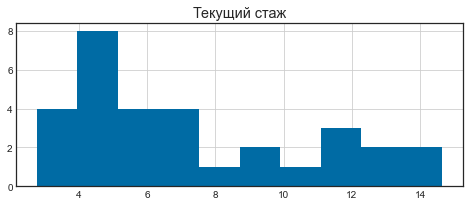

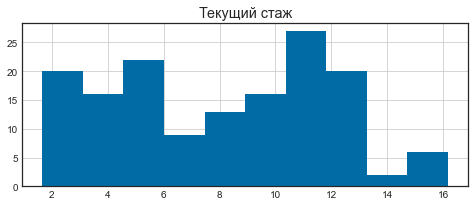

In [116]:
df11[['Текущий стаж']].hist(figsize=(8,3), bins=10);
df22[['Текущий стаж']].hist(figsize=(8,3), bins=10);

##### Критерий Колмогорова-Смирнова на всей выборке

In [59]:
stats.ks_2samp(df11['Текущий стаж'], df22['Текущий стаж'])

KstestResult(statistic=0.20807519760734886, pvalue=0.1843740252818148)

In [60]:
_, p_value_ks = stats.ks_2samp(df11['Текущий стаж'], df22['Текущий стаж'])

In [61]:
p_value_ks

0.1843740252818148

Даже на всей выборке гипотеза о сходстве распределений стажей не отвергается. Поскольку в обе выборки попали сотрудники с высокими должностями, можно сделать вывод о том, что в СВЭЛ редко берут людей "со стороны" сразу на высокую позицию :) 

##### Проверка допущения о сходстве изменений оценок эффективности (3 пункт про стаж)

In [105]:
df11['Относительная разница'] = (df11['После обучения (кол)'] - df11['До обучения (кол)']) / df11['До обучения (кол)']

In [108]:
df22['Относительная разница'] = (df22['2022 (кол)'] - df22['2021 (кол)']) / df22['2021 (кол)']

In [106]:
df11.head()

,Unnamed: 0,До обучения,После обучения,До обучения (кол),После обучения (кол),Текущий стаж,Относительная разница
0,Афисов Димитрис,1,0,1.9,1.4,4.019165,-0.263158
1,Бахтеев Александр,1,1,4.0,3.3,5.021218,-0.175000
2,Безукладников Андрей,1,1,3.1,3.2,14.655715,0.032258
3,Беспалов Даниил,1,1,4.0,3.4,13.073238,-0.150000
4,Вершинин Алексей,1,1,1.9,3.7,3.301848,0.947368


In [109]:
stats.ks_2samp(df11['Относительная разница'], df22['Относительная разница'])

KstestResult(statistic=0.19162572099978636, pvalue=0.2614840338336313)

Гипотеза об одинаковом распределении относительных разниц оценок принимается. \
Таким образом ниже сможем использовать критерий Манна-Уитни для несвязанных выборок

##### Подвыборки из группы сотрудников не проходивших обучение

Хотим получить схожие подгруппы по стажу. Берем рандомно 31 человек из группы не проходивших обучение и проверяем по критерию Колмогорова-Смирнова схожесть распределений. Если p_value > 0.4 гипотеза уверенно не отвергается, будет собирать такие подвыборки

In [95]:
results = []
p_values = []
for i in range(30):
    df_i = df22.sample(n=31)
    _, p_value_ks_i = stats.ks_2samp(df11['Текущий стаж'], df_i['Текущий стаж'])
    if p_value_ks_i > 0.4:
        results.append(df_i)
        p_values.append(p_value_ks_i)

In [96]:
p_values

[0.999115261755522,
 0.41354510011947465,
 0.615053935325554,
 0.41354510011947465,
 0.8234535171851342,
 0.8234535171851342,
 0.8234535171851342,
 0.8234535171851342,
 0.615053935325554,
 0.41354510011947465,
 0.8234535171851342,
 0.41354510011947465,
 0.9634297148886908,
 0.9634297148886908,
 0.8234535171851342,
 0.41354510011947465,
 0.8234535171851342,
 0.8234535171851342,
 0.8234535171851342]

Как видим, первая рандомная подгруппа получилось практически идентичной по стажу с группой проходившей обучение. Посмотрим на гистограммы распределения.

In [98]:
results[0].head(5)

,Unnamed: 0,2021,2022,2021 (кол),2022 (кол),Текущий стаж
120,Семенов Владимир,1,1,4.0,3.0,5.177276
7,Безумов Андрей,1,0,3.0,2.0,11.025325
95,Обухова Ольга,1,1,3.0,3.0,12.980151
88,Мельников Владимир,1,1,2.7,2.9,11.635866
45,Жемчужников Евгений,1,1,4.0,3.0,13.073238


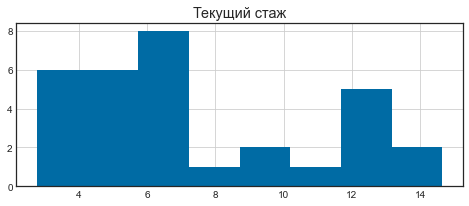

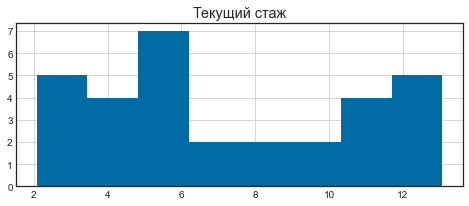

In [117]:
df11[['Текущий стаж']].hist(figsize=(8,3), bins=8);
results[0][['Текущий стаж']].hist(figsize=(8,3), bins=8);

##### Критерий Манна-Уитни

$H_0: f_X(x) = f_Y(x)$ Нулевая гипотеза: Количественная оценка у сотрудников обеих групп изменяется одинаково\
$H_1: f_X(x) = f_Y(x + \delta), \delta > 0$ Альтернативная гипотеза: Количественная оценка у сотрудников, прошедших обучение изменяется в положительную сторону относительно сотрудников первой группы

In [111]:
results[0]['Относительная разница'] = (results[0]['2022 (кол)'] - results[0]['2021 (кол)']) / results[0]['2021 (кол)']

In [112]:
stats.mannwhitneyu(df11['Относительная разница'], results[0]['Относительная разница'], alternative='greater')

MannwhitneyuResult(statistic=453.5, pvalue=0.651556842455695)

Как видим, на самой первой подвыборке нулевая гипотеза принимается. Посмотрим на остальных подвыборках.

In [113]:
results_p = []
for element in results:
    element['Относительная разница'] = (element['2022 (кол)'] - element['2021 (кол)']) / element['2021 (кол)']
    _, pv = stats.mannwhitneyu(df11['Относительная разница'], element['Относительная разница'], alternative='greater')
    results_p.append(pv)

In [118]:
pd_result = pd.DataFrame()
pd_result['p_value'] = results_p

In [120]:
pd_result.head()

,p_value
0,0.651557
1,0.505650
2,0.699217
3,0.468995
4,0.937115


In [114]:
print(results_p)

[0.651556842455695, 0.5056501006098247, 0.699217491993519, 0.468995392831713, 0.9371151788278804, 0.6515311462485674, 0.8521484917728593, 0.9336154048170793, 0.4605151794469652, 0.7038240449901516, 0.7050249870220673, 0.7677299365071911, 0.46039681204837746, 0.594928632719157, 0.37483356908229093, 0.4131232680067856, 0.9822882945734434, 0.8696141362580905, 0.7266393246800726]


Увы, во всех подвыборках (аж 19) уверенно принимается нулевая гипотеза

### Коэффициент Фи-Гилфорда

[О коэффициенте Гилфорда](https://bss-around.ru/articles/?article=/arch/calculate&sid=&psw=#:~:text=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82%20%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8%20%D0%93%D0%B8%D0%BB%D1%84%D0%BE%D1%80%D0%B4%D0%B0%20%2D%20%D1%88%D0%B8%D1%80%D0%BE%D0%BA%D0%BE%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D0%B5%D0%BC%D1%8B%D0%B9,%D0%B8%20%D1%81%D1%82%D0%BE%D0%BB%D0%B1%D1%86%D0%BE%D0%B2%204%2D%D0%BA%D0%BB%D0%B5%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D0%B9%20%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D1%8B.)

Описание:

Исследуемым бинарным признаком, будет следующий:

$$A = \{Сотрудник \;\; проходил \;\; обучение\}.$$

Для данного признака посчитаем коэффициент Фи-Гилфорда. Будем использовать подвыборки, полученные в предыдущем пункте.

Преимущество: оценивает категориальные данные, непосредственно то, что нужно бизнесу - выполняет сотрудник KPI или нет, применяется в социологических исследованиях \
Недостаток: при переводе количественных данных в бинарные теряется часть информации

In [147]:
dfdf = df.rename(columns={'После обучения': '2022'})

In [150]:
dfdf['Проходил обучение'] = [1] * len(df)
results[0]['Проходил обучение'] = [0] * len(results[0])
guilford = pd.concat([dfdf['2022'], results[0][2022]], axis=0, ignore_index=True)
is_studied = pd.concat([dfdf['Проходил обучение'], results[0]['Проходил обучение']], axis=0, ignore_index=True)

In [153]:
df_guilford = pd.DataFrame({'Проходил обучение': is_studied, 'Выполнил KPI': guilford})

##### Вид исследуемого датасета Гилфорда. Пример расчета на первой подвыборке

In [156]:
df_guilford.head(4)

,Проходил обучение,Выполнил KPI
0,1,0
1,1,1
2,1,1
3,1,1


##### Как считались коэффициенты:

Из логики следующей 4-клеточной таблицы

In [185]:
guilford_logic = pd.DataFrame({'Выполнил KPI в 2022': ['a', 'c'], 'Не выполнил KPI в 2022': ['b', 'd']})
guilford_logic.rename(index={0: 'Проходил обучение', 1: 'Не проходил обучение'}, inplace=True)
guilford_logic

,Выполнил KPI в 2022,Не выполнил KPI в 2022
Проходил обучение,a,b
Не проходил обучение,c,d


In [157]:
a = len(df_guilford[(df_guilford['Проходил обучение'] == 1) & (df_guilford['Выполнил KPI'] == 1)])
b = len(df_guilford[(df_guilford['Проходил обучение'] == 1) & (df_guilford['Выполнил KPI'] == 0)])
c = len(df_guilford[(df_guilford['Проходил обучение'] == 0) & (df_guilford['Выполнил KPI'] == 1)])
d = len(df_guilford[(df_guilford['Проходил обучение'] == 0) & (df_guilford['Выполнил KPI'] == 0)])
phi = (a * d - b * c) / (((a + b) * (c + d) * (a + c) * (b + d)) ** 0.5)
print(phi)

0.08164965809277261


На первой подвыборке получили коэффициент Гилфорда, равный 0.08

##### Подсчет коэффициентов на всех подвыборках

In [158]:
guilfords = []
for i in range(len(results)):
    results[i]['Проходил обучение'] = [0] * len(results[i])
    guilford_i = pd.concat([dfdf['2022'], results[i][2022]], axis=0, ignore_index=True)
    is_studied_i = pd.concat([dfdf['Проходил обучение'], results[i]['Проходил обучение']], axis=0, ignore_index=True)
    df_guilford_i = pd.DataFrame({'Проходил обучение': is_studied_i, 'Выполнил KPI': guilford_i})
    a_i = len(df_guilford_i[(df_guilford_i['Проходил обучение'] == 1) & (df_guilford_i['Выполнил KPI'] == 1)])
    b_i = len(df_guilford_i[(df_guilford_i['Проходил обучение'] == 1) & (df_guilford_i['Выполнил KPI'] == 0)])
    c_i = len(df_guilford_i[(df_guilford_i['Проходил обучение'] == 0) & (df_guilford_i['Выполнил KPI'] == 1)])
    d_i = len(df_guilford_i[(df_guilford_i['Проходил обучение'] == 0) & (df_guilford_i['Выполнил KPI'] == 0)])
    phi_i = (a_i * d_i - b_i * c_i) / (((a_i + b_i) * (c_i + d_i) * (a_i + c_i) * (b_i + d_i)) ** 0.5)
    guilfords.append(phi_i)

In [159]:
pd_guilfords = pd.DataFrame()
pd_guilfords['guilford'] = guilfords

In [186]:
pd_guilfords

,guilford
0,0.081650
1,0.154303
2,0.000000
3,0.118864
4,0.081650
5,0.000000
6,-0.152894
7,0.154303
8,0.000000
9,0.118864


Коэффициенты Гилфорда на полученных подвыборках не превышают 0.16, что говорит о незначимом влиянии признака

## Выводы

-- При фиксированных допущениях и ограничениях абсолютно все используемые тесты и подходы не выявили статистически значимого роста выполнения KPI у сотрудников, проходивших обучение

Можно сделать вывод о том, что в действующей методике оценивания KPI, прохождение сотрудниками курса "Управление проектами" не является значимым признаком, влияющим на эффективность. Однако, есть вероятность, что оценка итоговой эффективности - слишком нагруженная мера оценивания, включающая в себя слишком много различных критериев, и прохождение учебных курсов не может напрямую повлиять на нее. В связи с чем возникает идея проверить значимость исследуемого признака непосредственно на KPI по проектным задачам.

##### Дальнейший план исследования

1) Будет правильнее увеличить выборку в п.3 и п.4 за счет того, что там не требуются ограничения на связанность выборок - это позволит получить более точные результаты. Выборка увеличится в два раза - серьезное уточнение результатов

2) Может быть есть смысл проверить значимость обучения на KPI по проектным задачам?

3) Провести исследование на группах с более четкими критериями оценивания эффективности (может быть, производственниками)